In [154]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

from astropy.coordinates import SkyCoord
import astropy.units as u

from glob import glob
import pandas as pd

from unlzw import unlzw

In [150]:
flats = glob('../../../../data/mjo/moa/flat/*-3.fit*')
darks = glob('/Users/rridden/Documents/work/data/mjo/moa/dark/*-3.fit.Z')
darks = glob('/Users/rridden/Documents/work/data/mjo/moa/dark/*.Z')


In [164]:
hdr = fits.HDUList.fromstring(unlzw(open(darks[0],mode='rb').read()))[0]
#hdr.get('ORIGFILE')

In [165]:
hdr

In [152]:
fits.open(darks[0])

OSError: No SIMPLE card found, this file does not appear to be a valid FITS file

In [143]:
mdark = []
for d in darks:
    mdark += [fits.open(d)[0].data]
mdark = np.nanmedian(mdark,axis=0)

In [144]:
eh = set(darks)
thing = set(darks[:1])

In [145]:
new = eh ^ thing

In [146]:
darktable = pd.read_csv('../dark_list.csv')
while len(new) > 0:
    entry = {}
    n = new.pop()
    name = n.split('/')[-1].split('.')[0]
    entry['name'] = name
    header = fits.open(n)[0].header
    entry['chip'] = header['CHIP']
    entry['exptime'] = header['EXPTIME']
    entry['jd'] = header['JDSTART']
    entry['date'] = header['DATE-OBS']
    entry['filename'] = n
    
    darktable = darktable.append(entry, ignore_index=True)


In [147]:
darktable

,name,chip,exptime,jd,date,filename
0,D22370-5-a-3,3,5,2.459524e+06,2021-11-05,/Users/rridden/Documents/work/data/mjo/moa/dar...
1,D22370-5-c-3,3,5,2.459524e+06,2021-11-05,/Users/rridden/Documents/work/data/mjo/moa/dar...


In [72]:
'../../../../data/mjo/moa/dark/D22370-5-a-3.fit' in thing 

True

In [119]:
fits.open(l)[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2048 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =               32768. / REAL = FILE * BSCALE + BZERO                   
OBSTEL  = '  MOA-II telescope' / Observing telescope                            
CAMERA  = '          MOA-cam3' / Observing camera                               
FNUM    = '             f2.91' / F number                                       
OBSVAT  = '        Mount Joh

In [68]:
thing.union(a)


{5865, 5866, 5867}

In [67]:
a

array([5865, 5865, 5865, 5865, 5865, 5866, 5867, 5866, 5866, 5867, 5866,
       5866])

In [15]:
flats

['../../../../data/mjo/moa/flat/F5865-5-R-e-3.fit',
 '../../../../data/mjo/moa/flat/F5865-5-R-c-3.fit',
 '../../../../data/mjo/moa/flat/F5865-5-R-a-3.fit',
 '../../../../data/mjo/moa/flat/F5865-5-R-d-3.fit',
 '../../../../data/mjo/moa/flat/F5865-5-R-b-3.fit',
 '../../../../data/mjo/moa/flat/F5866-15-R-e-3.fit',
 '../../../../data/mjo/moa/flat/F5867-15-R-a-3.fit',
 '../../../../data/mjo/moa/flat/F5866-15-R-c-3.fit',
 '../../../../data/mjo/moa/flat/F5866-15-R-a-3.fit',
 '../../../../data/mjo/moa/flat/F5867-15-R-b-3.fit',
 '../../../../data/mjo/moa/flat/F5866-15-R-d-3.fit',
 '../../../../data/mjo/moa/flat/F5866-15-R-b-3.fit']

In [41]:
im = np.nanmedian([fits.open(flats[1])[0].data,fits.open(flats[0])[0].data],axis=0)
im = (im-mdark)/np.nanmedian(im)

<IPython.core.display.Javascript object>


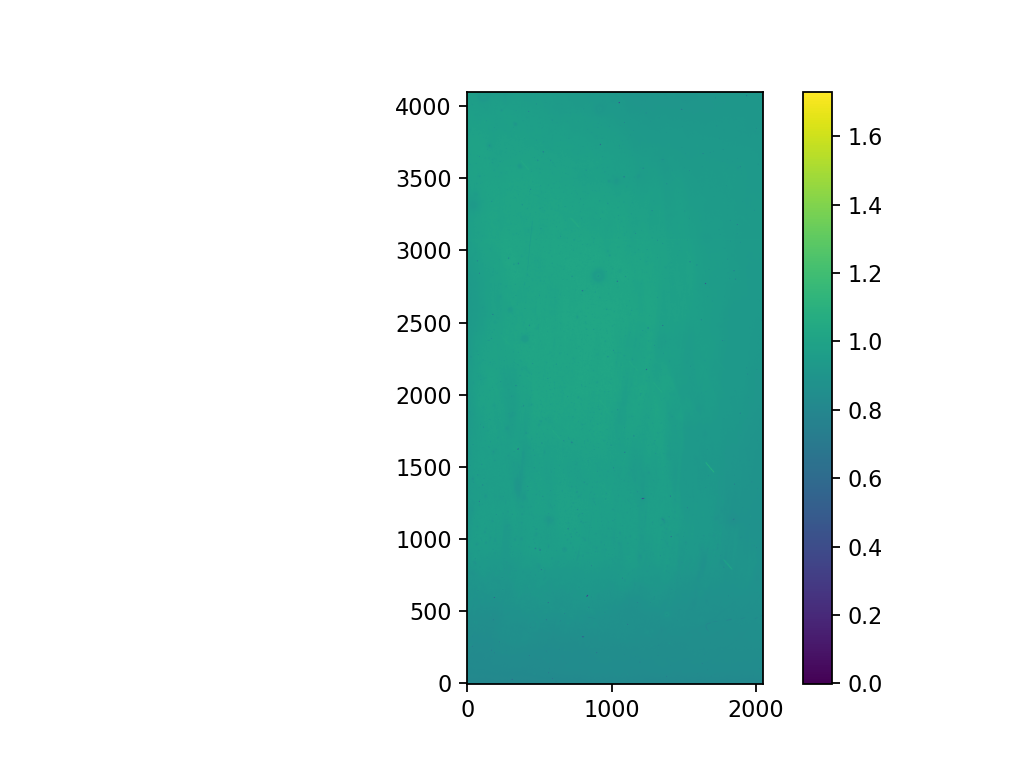

In [42]:
plt.figure()
plt.imshow(im,origin='lower')
plt.colorbar()

In [149]:
fits.open(flats[6])[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2048 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =               32768. / REAL = FILE * BSCALE + BZERO                   
OBSTEL  = '  MOA-II telescope' / Observing telescope                            
CAMERA  = '          MOA-cam3' / Observing camera                               
FNUM    = '             f2.91' / F number                                       
OBSVAT  = '        Mount Joh